<a href="https://colab.research.google.com/github/AyinavoluLakshmiHarshitha/21471A0103/blob/main/hackathon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('housing_prices.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print(df.describe())


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [ ]:
df.drop(["hotwaterheating","prefarea"], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,yes,2,furnished


In [ ]:
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus


In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  furnishingstatus  545 non-null    object
dtypes: int64(6), object(5)
memory usage: 47.0+ KB


In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


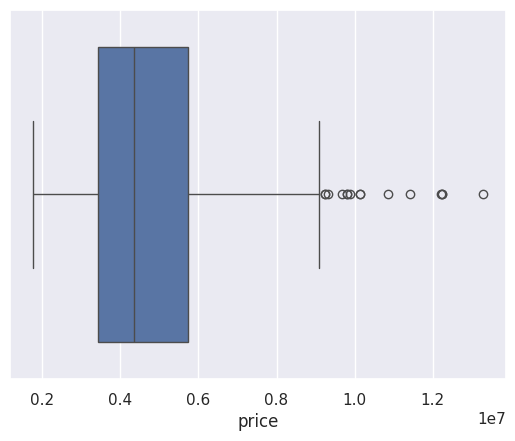

In [ ]:
sns.boxplot(x = df['price'])
plt.show()

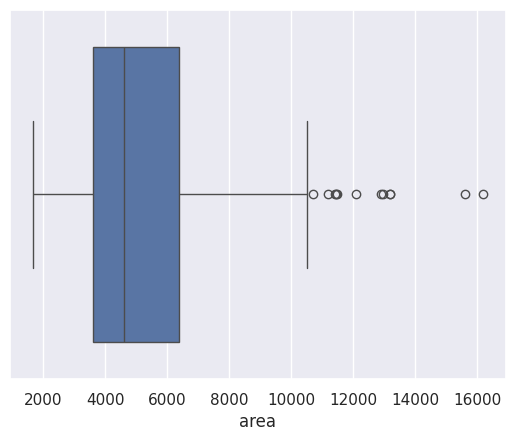

In [ ]:
sns.boxplot(x = df['area'])
plt.show()

In [ ]:
# print all the columns which are of int or float datatype in df.

df1 = df.loc[:, df.dtypes != object]
df1

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [ ]:
# save column names of the above output in variable list
l = list(df.loc[:, df.dtypes != object].columns)
l

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [ ]:
z = np.abs(stats.zscore(df[l]))
z

,price,area,bedrooms,bathrooms,stories,parking
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409
4,3.554979,1.046726,1.403419,0.570187,0.224410,1.517692
...,...,...,...,...,...,...
540,1.576868,0.991879,1.308863,0.570187,0.929397,1.517692
541,1.605149,1.268613,0.047278,0.570187,0.929397,0.805741
542,1.614327,0.705921,1.308863,0.570187,0.929397,0.805741
543,1.614327,1.033389,0.047278,0.570187,0.929397,0.805741


In [ ]:
threshold = 3
df3 = df[(z<threshold).all(axis = 1)]
df3

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
8,9870000,8100,4,1,2,yes,yes,yes,yes,2,furnished
9,9800000,5750,3,2,4,yes,yes,no,yes,1,unfurnished
12,9310000,6550,4,2,2,yes,no,no,yes,1,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,no,2,furnished
14,9240000,7800,3,2,2,yes,no,no,no,0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,0,furnished


In [ ]:
# print the shape difference of df df2 and df3.
print(df.shape)
#print(df2.shape)
print(df3.shape)

(545, 11)
(522, 11)


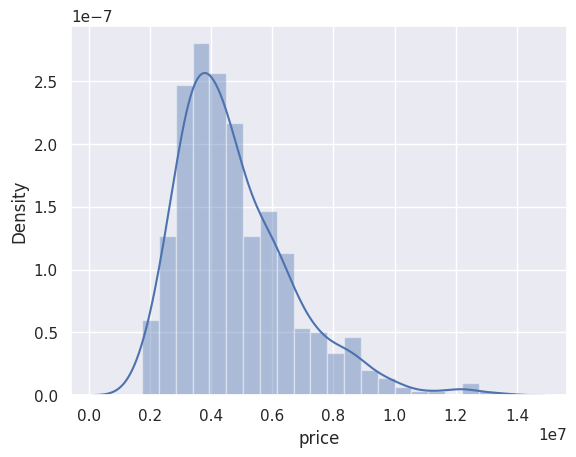

In [ ]:
#ploting distplot for variable price
sns.distplot(df['price'])
plt.show()

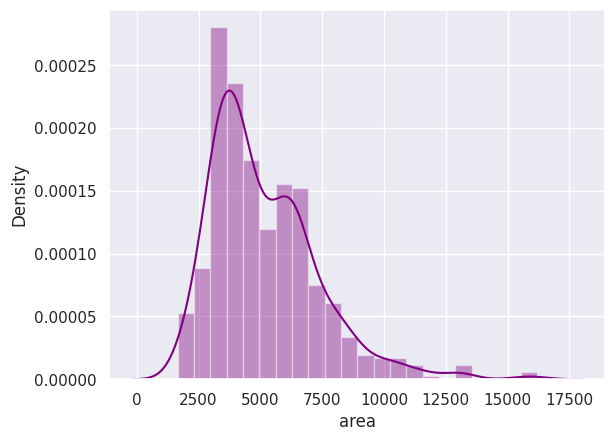

In [ ]:
#ploting distplot for variable area
sns.distplot(df['area'],color="purple")
plt.show()

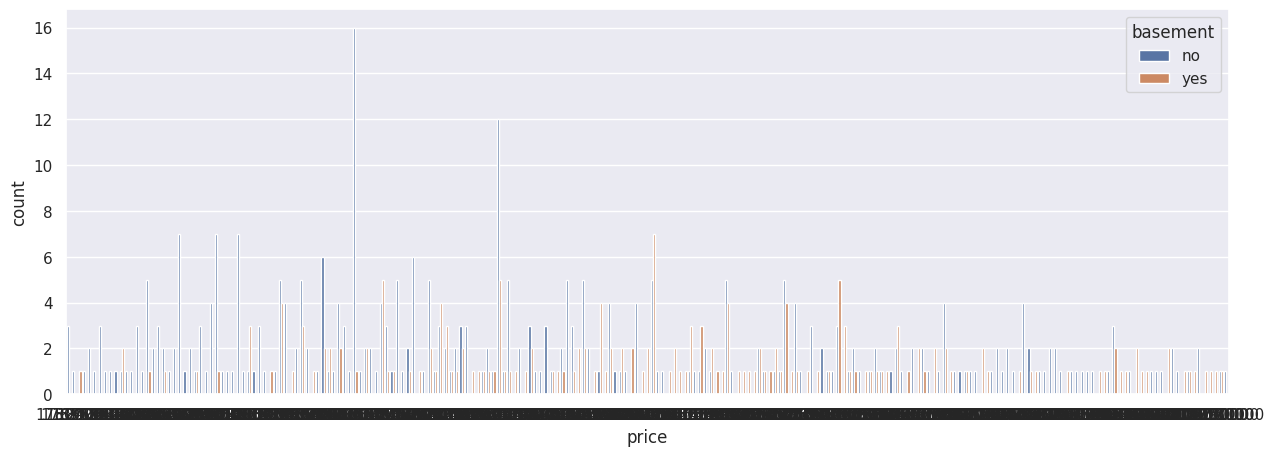

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(x = 'price', hue = 'basement', data = df)
plt.show()


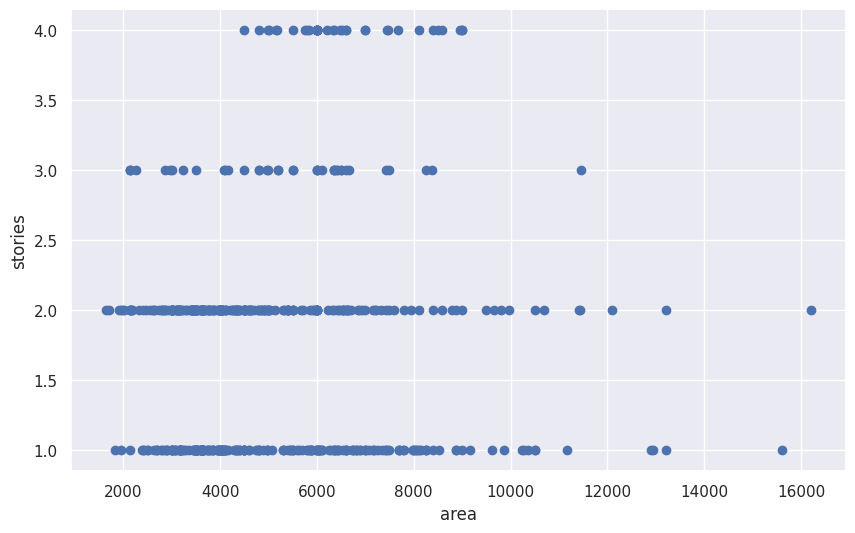

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=df['area'], y=df['stories'])
ax.set_xlabel('area')
ax.set_ylabel('stories')
plt.show()

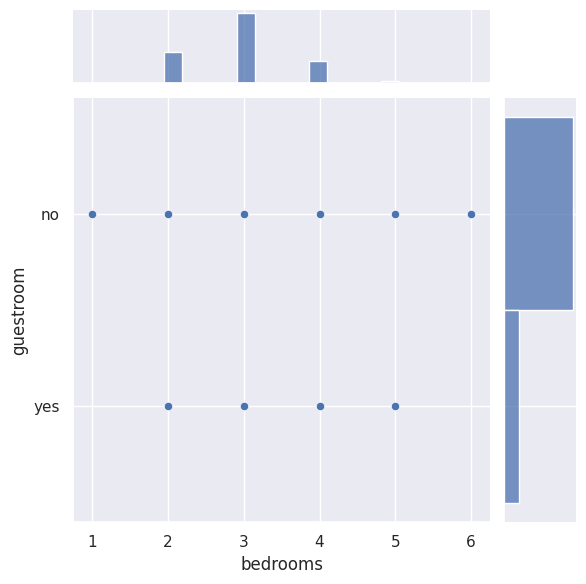

In [ ]:

sns.jointplot(x = df['bedrooms'],y = df['guestroom'], data=df)
plt.show()

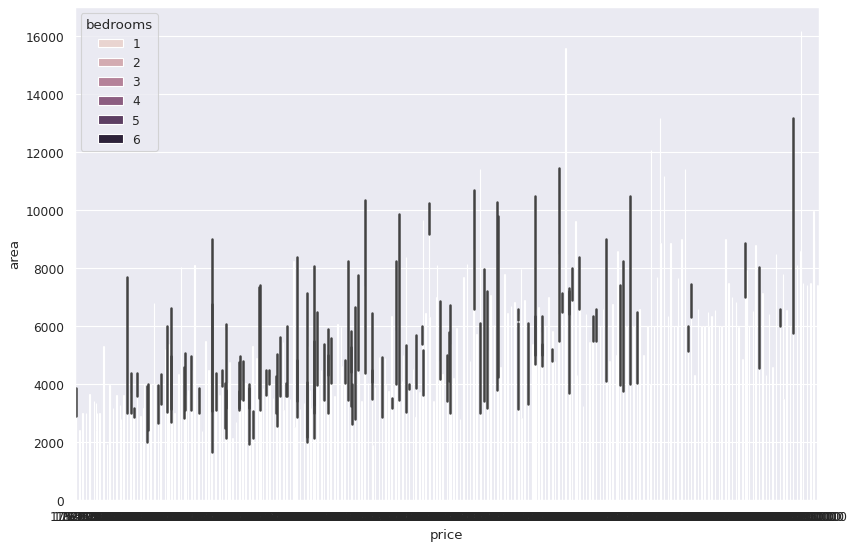

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x = 'price', y = 'area',hue = 'bedrooms', data = df, estimator = np.median)
plt.show()

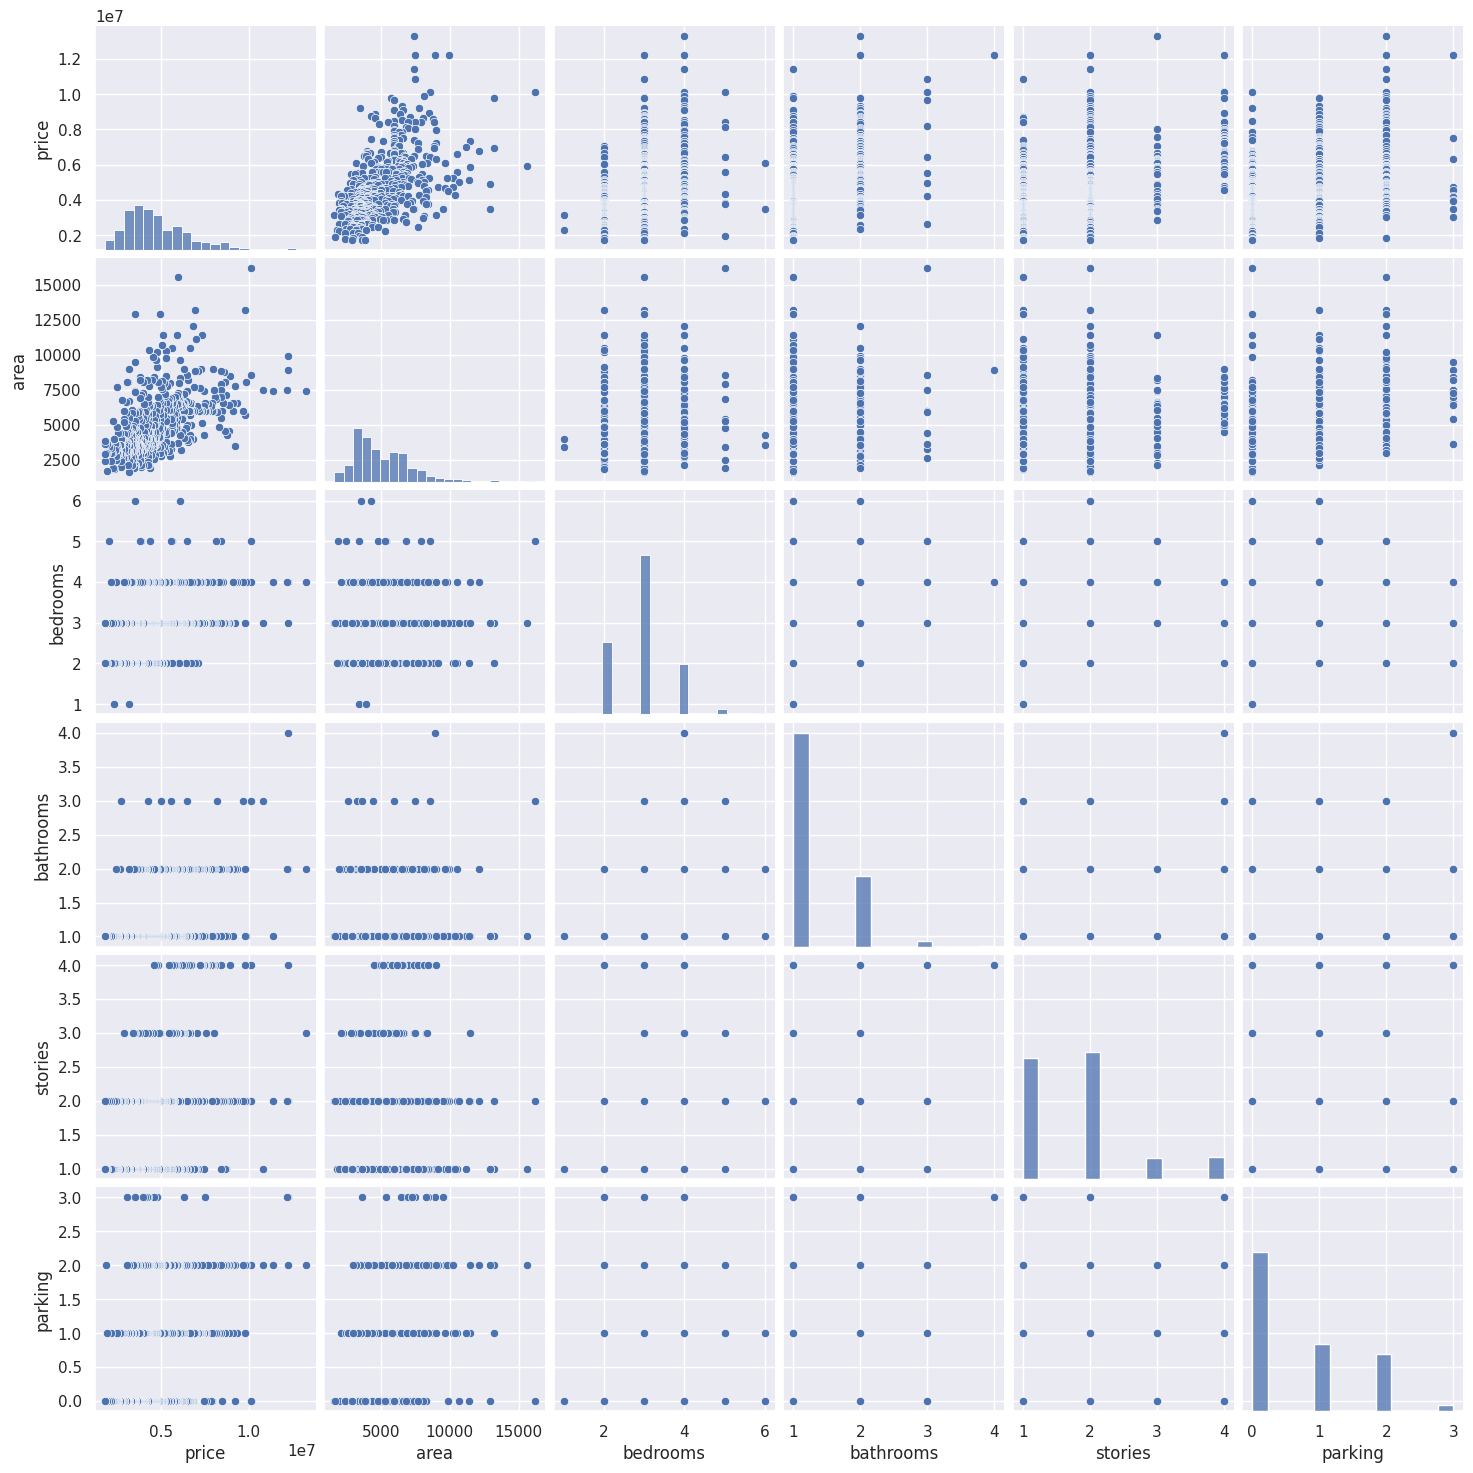

In [ ]:
# plot pairplot on df

sns.pairplot(df)
plt.show()

In [ ]:
#the correlation of features of the data
corr = df1.corr()
corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


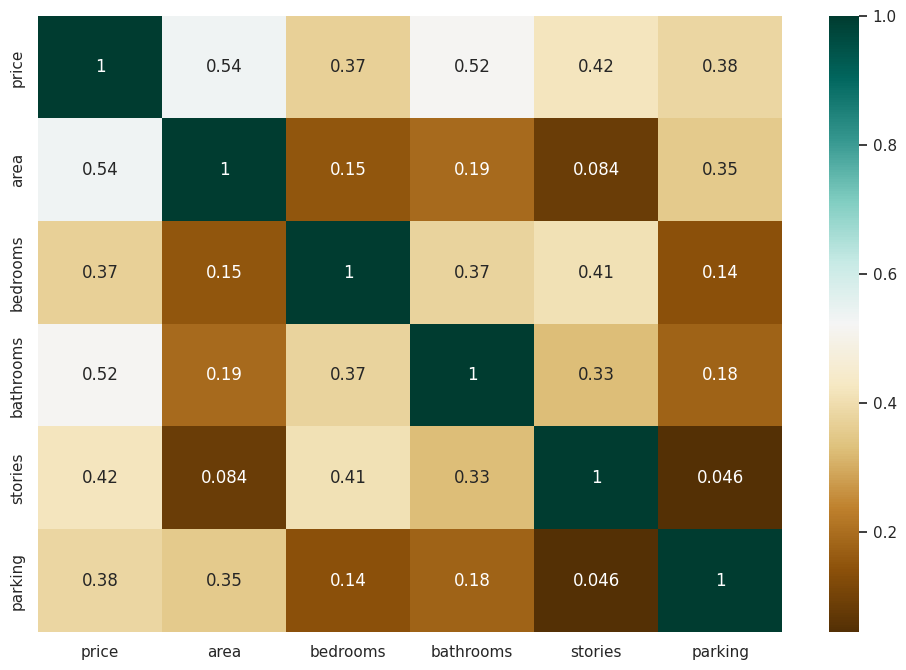

In [ ]:
# set cmap = 'BrBG', annot = True - to get the same graph as shown below
# set size of graph = (12,8)
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap = 'BrBG', annot = True)
plt.show()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 8 to 544
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             522 non-null    int64 
 1   area              522 non-null    int64 
 2   bedrooms          522 non-null    int64 
 3   bathrooms         522 non-null    int64 
 4   stories           522 non-null    int64 
 5   mainroad          522 non-null    object
 6   guestroom         522 non-null    object
 7   basement          522 non-null    object
 8   airconditioning   522 non-null    object
 9   parking           522 non-null    int64 
 10  furnishingstatus  522 non-null    object
dtypes: int64(6), object(5)
memory usage: 48.9+ KB


In [ ]:
# Define features and target variable
X = df.drop('price', axis=1)
y = df['price']
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,7420,4,2,3,yes,no,no,yes,2,furnished
1,8960,4,4,4,yes,no,no,yes,3,furnished
2,9960,3,2,2,yes,no,yes,no,2,semi-furnished
3,7500,4,2,2,yes,no,yes,yes,3,furnished
4,7420,4,1,2,yes,yes,yes,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,2,unfurnished
541,2400,3,1,1,no,no,no,no,0,semi-furnished
542,3620,2,1,1,yes,no,no,no,0,unfurnished
543,2910,3,1,1,no,no,no,no,0,furnished


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_train: {X_test.shape}")
print(f"Shape of X_train: {y_test.shape}")

Shape of X_train: (272, 10)
Shape of y_train: (272,)
Shape of X_train: (273, 10)
Shape of X_train: (273,)


In [ ]:
#Encoding feature variables
from sklearn.preprocessing import LabelEncoder
categorical_cols=["mainroad","guestroom","basement","airconditioning","furnishingstatus"]
label_encoder = LabelEncoder()

# Encode the categorical columns in X_train
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Encode the categorical columns in X_test
for col in categorical_cols:
    X_test[col] = label_encoder.fit_transform(X_test[col])
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
316,5900,4,2,2,0,0,1,0,1,2
77,6500,3,2,3,1,0,0,1,0,0
360,4040,2,1,1,1,0,0,0,0,1
90,5000,3,1,2,1,0,0,1,0,1
493,3960,3,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
290,2610,4,3,2,0,0,0,0,0,1
478,3600,3,1,2,0,0,0,0,1,2
334,3290,2,1,1,1,0,0,0,1,0
436,2145,3,1,2,1,0,1,0,0,0


In [ ]:
#Encoding target variables
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the train target variable
y_train= label_encoder.fit_transform(y_train)

# Transform the test target variable using the fitted encoder
y_test= label_encoder.fit_transform(y_test)

# Print the encoded train and test target variables
print(f"Encoded train target variable: {y_train}")
print(f"Encoded test target variable: {y_test}")

# Print the shapes of the encoded target variables
print(f"Shape of encoded train target variable: {y_train.shape}")
print(f"Shape of encoded test target variable: {y_test.shape}")

Encoded train target variable: [133  97  70  54 124 108  59  59  67  33  96  65  29 132  45  83  33  96
  26  96  45  54 105  19 115  96  72  22 115  26  59  36 105  87  82  71
  49  51  36  33  26  55 104  49  76   9  78 102  19  53   4  18  18  35
  51  59  32  38  28 107  88  47  38  41  56  95  26  73  11  46  92  55
  97  84  69  74 106 105  36  76  23  39  48 103   3  60  16  22 109  31
  42 100   7 128  90 121  61 118  71  86  29  93 141 134 137  90  96  26
  37  77 115 126  72  31  46  29  89  27 130  15  27  82  36  61  44  36
  69  22 143  69  11 112  75  11  81  19  90 114  59  79 123  34 127 136
  65  52  82  12 137  17  75  68  41  59  31  93  36  19  97 123  98 102
   6 142  52  49 122  59 140  94 131  40  86   3  79  33  61  15  17  51
  73  82  81  59   9  70   2  24   0  59  46  64  26  82  93 129  79  36
  85  57  68 110 125  36 144  14  43 126  31 119  82 135  29  66  30  25
  27  42 116  50   8 125  49  66  71 140  56 117  36  63  91  52   1  99
  58  18   5  13  55

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 78.50146331, 108.80516114,  34.28947199,  67.16228143,
        42.68575054,  49.52782691,  95.32545911, 104.76095777,
        25.86269597,  20.86427831, 154.78553237,  27.89275632,
        26.82470419,  41.55825412,  55.1066701 ,  69.94619053,
        30.2706758 ,  72.4076617 ,  71.8624548 ,  47.23886469,
        80.51631303,  95.76610509,  26.00980891,  70.03545289,
        92.62597952, 125.62496416,  48.32208583,  88.38492625,
       149.99307158,  42.57390018,  91.42103491,  39.53730986,
       117.21875039,  63.98964397,  49.36511368,  85.43158254,
        85.65616362,  66.95837862,  28.46749809,  64.20060807,
        72.21870515,  39.72695185, 108.2766145 ,  58.06547226,
        52.19398945,  58.96029893, 109.26449642,  58.50452123,
        55.08648099,  44.68034238, 121.98306102,  26.05691293,
        68.96428913,  64.65049311,  56.15484903,  22.25171324,
       117.96834119,  30.44545146,  66.12795034,  27.0074407 ,
        68.14305937,  31.77487375,  76.9933599 ,  62.80

In [ ]:
scoremodel=model.score(X_test,y_test)
scoremodel

0.6465429789361331

In [ ]:
scoremodel=model.score(X_train,y_train)
scoremodel

0.6839124937248013

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 78.50146331, 108.80516114,  34.28947199,  67.16228143,
        42.68575054,  49.52782691,  95.32545911, 104.76095777,
        25.86269597,  20.86427831, 154.78553237,  27.89275632,
        26.82470419,  41.55825412,  55.1066701 ,  69.94619053,
        30.2706758 ,  72.4076617 ,  71.8624548 ,  47.23886469,
        80.51631303,  95.76610509,  26.00980891,  70.03545289,
        92.62597952, 125.62496416,  48.32208583,  88.38492625,
       149.99307158,  42.57390018,  91.42103491,  39.53730986,
       117.21875039,  63.98964397,  49.36511368,  85.43158254,
        85.65616362,  66.95837862,  28.46749809,  64.20060807,
        72.21870515,  39.72695185, 108.2766145 ,  58.06547226,
        52.19398945,  58.96029893, 109.26449642,  58.50452123,
        55.08648099,  44.68034238, 121.98306102,  26.05691293,
        68.96428913,  64.65049311,  56.15484903,  22.25171324,
       117.96834119,  30.44545146,  66.12795034,  27.0074407 ,
        68.14305937,  31.77487375,  76.9933599 ,  62.80

In [ ]:
#evaluating model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae1=mean_absolute_error(y_test,y_pred)
mse1=mean_squared_error(y_test,y_pred)
rsq1=np.sqrt(mse1)
r2LR=r2_score(y_test,y_pred)
print("mean absolute error for train data",mae1)
print("root mean squared error for train data",rsq1)
print("r2_score for train data",r2LR)


mean absolute error for train data 19.69052806799418
root mean squared error for train data 24.64443110704349
r2_score for train data 0.6465429789361331


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred2=dtr.predict(X_test)
y_pred2

array([ 24., 130.,  49.,  97.,  66.,  15.,  51.,  51.,   3.,   9., 137.,
        64.,  31.,  36.,  52.,  18.,  33.,  36.,  24.,  79., 100., 105.,
        23.,  16.,  89., 137.,  51.,  47., 142.,  19.,  81.,  48., 124.,
        60.,  31.,  52., 139.,  59.,  23.,  59.,  87.,  18., 130.,  58.,
        61.,  34., 141.,  36.,  15.,  26., 137.,   1.,  87.,  82.,  52.,
         9., 100.,  48.,  85.,  31.,  88.,  19.,  79.,  59.,  55.,  71.,
        92.,  51., 127.,  82.,  51.,  93.,  45., 121.,  13.,  61.,  71.,
        97.,  79.,  19., 134.,  69., 117.,  78.,  48., 105.,  10.,  46.,
       137., 129.,  49., 122.,  36.,  82., 137.,  53.,  51., 100., 100.,
        93.,  17.,  52.,   9.,  47.,  29.,  85., 141., 124., 134., 128.,
       144.,  68.,  51.,  23.,  58.,  23.,  19.,   7.,  79.,  41.,  15.,
        79.,  74.,  71.,  93.,  59.,  19.,  15., 137., 144.,   9.,  97.,
       117., 133.,  19.,  18.,  36.,  52.,  28.,  71.,  73.,  41.,  56.,
        79.,  15.,  64., 141.,  54.,  78.,  93.,  9

In [ ]:
scoredtr=dtr.score(X_test,y_test)
scoredtr

0.3870982852854993

In [ ]:
scoredtr=dtr.score(X_train,y_train)
scoredtr


0.998851958985672

In [ ]:
#evaluating model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae2=mean_absolute_error(y_test,y_pred2)
mse2=mean_squared_error(y_test,y_pred2)
rsq2=np.sqrt(mse2)
r2dtr=r2_score(y_test,y_pred2)
print("mean absolute error",mae2)
print("root mean squared error",rsq2)
print("r2_score",r2dtr)

mean absolute error 24.479853479853478
root mean squared error 32.452331906256696
r2_score 0.3870982852854993


In [ ]:
#Choosing linear regression as it gives better score,builts pattern between data,computes well.
df_predicted=pd.DataFrame({"predicted price":y_pred})
df_predicted

,predicted price
0,78.501463
1,108.805161
2,34.289472
3,67.162281
4,42.685751
...,...
268,60.415040
269,29.211727
270,39.365677
271,54.441983
